In [7]:
import mglearn
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
tree.fit(X_train, y_train)

print("Accuracy on the training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training set: 0.988
Accuracy on test set: 0.951


In [9]:
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
feature_names=cancer.feature_names, impurity=True, filled=True)

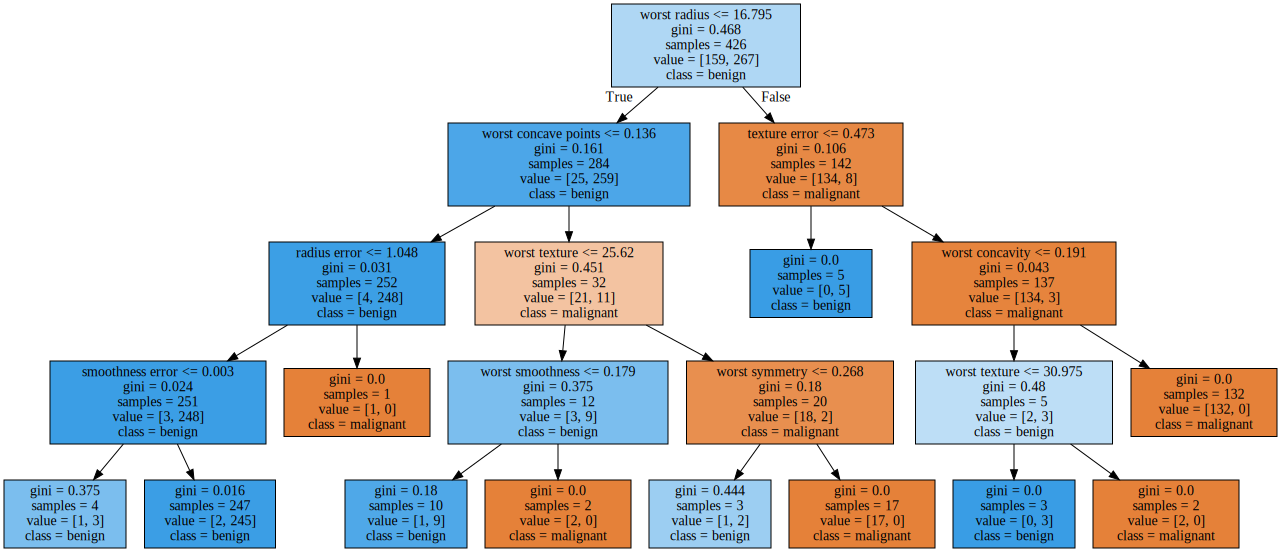

In [10]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

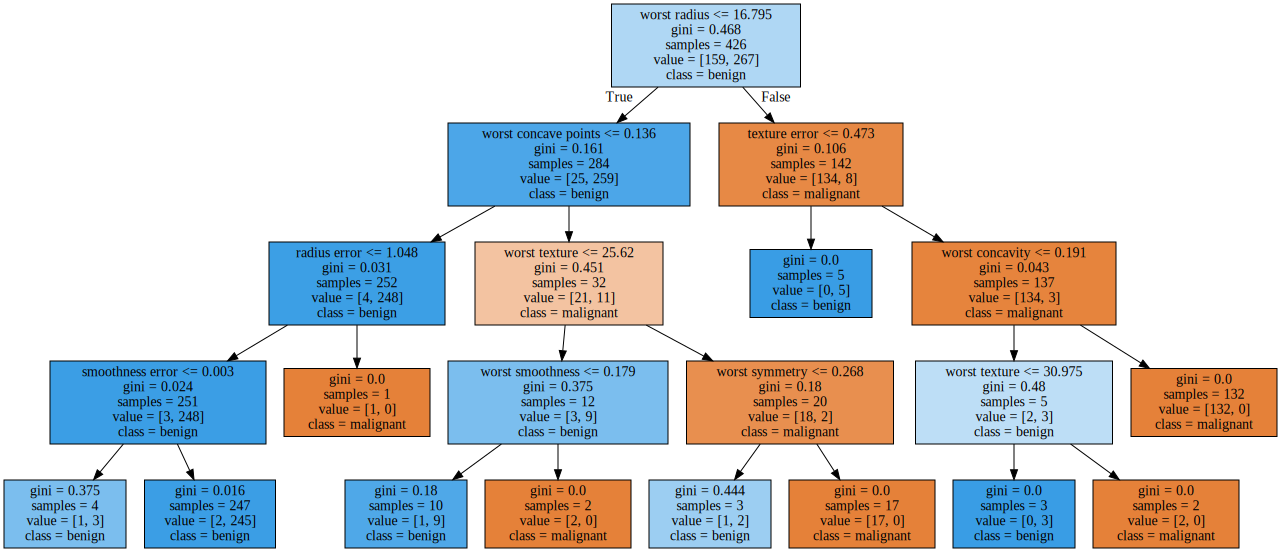

In [11]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [12]:
print("Feature importances:\n{}".format(cancer.feature_names[list(tree.feature_importances_).index(max(tree.feature_importances_))]))

Feature importances:
worst radius


In [13]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

In [14]:
print(cancer.target[list(cancer.data[20]).index(cancer.data[20][1])])

0


In [15]:
# 1. Finding the indices of the feature columns in the data.
worst_radius_index = list(cancer.feature_names).index("worst radius")
worst_texture_index = list(cancer.feature_names).index("smoothness error")

# 2. Separating those two columns and arranging their values.
wr_arranged = np.sort(cancer.data[worst_radius_index])
wt_arranged = np.sort(cancer.data[worst_texture_index])

# 3. Find
for x in [wr_arranged, wt_arranged, worst_texture_index]:
    i = 0
    list_of_gini = []
    while i < len(x) - 1:

        avg_of_two_adjacent = (x[i] + x[i+1]) / 2
        sum_benigny, sum_benignn, sum_malignanty, sum_malignantn = [u for u in [0, 0, 0, 0]]
        
        # Looping over all values in the column.
        for value in x:
            # If the value is less than the current average
            if value < avg_of_two_adjacent:
                if cancer.target[list(x).index(value)] == 0:
                    sum_malignanty += 1
                else:
                    sum_benigny += 1
            else:
                if cancer.target[list(x).index(value)] == 0:
                    sum_malignantn += 1
                else:
                    sum_benignn += 1
        
        total_sumy = sum_benigny + sum_malignanty
        total_sumn = sum_benignn + sum_malignantn
        total_sum = total_sumn + total_sumy
        
        current_giniy = 1 - (sum_benigny / total_sumy) ** 2 - (sum_malignanty / total_sumy) ** 2
        current_ginin = 1 - (sum_benignn / total_sumn) ** 2 - (sum_malignantn / total_sumn) ** 2
        current_gini =  (total_sumy  / total_sum) * current_giniy + (total_sumn / total_sum) * current_ginin
        i += 2        
        
        list_of_gini.append(current_gini)
    print(list_of_gini, '\n\n')

[0.17931034482758612, 0.17777777777777778, 0.17600000000000005, 0.17391304347826084, 0.17142857142857146, 0.16842105263157903, 0.16470588235294117, 0.15999999999999992, 0.15384615384615383, 0.14545454545454545, 0.1798941798941798, 0.17391304347826084, 0.17600000000000005, 0.17777777777777778, 0.17931034482758612] 


[0.17931034482758612, 0.17777777777777778, 0.17600000000000005, 0.17391304347826084, 0.17142857142857146, 0.16842105263157903, 0.16470588235294117, 0.15999999999999992, 0.15384615384615383, 0.14545454545454545, 0.1798941798941798, 0.17391304347826084, 0.17600000000000005, 0.17777777777777778, 0.17931034482758612] 




TypeError: object of type 'int' has no len()

In [16]:
%matplotlib widget
plot_feature_importances_cancer(tree)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Feature importances: [0. 1.]


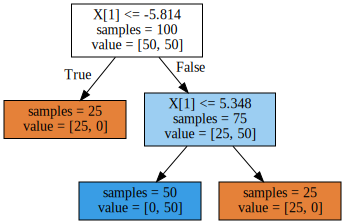

In [17]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [18]:
%matplotlib widget
ram_prices = pd.read_csv("introduction_to_ml_with_python-master/data/ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Price in $/Mbyte')

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# dividing the main dataframe to a training one, and a testing one.
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]



X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

In [20]:
%matplotlib widget
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Testing data")

plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear regression prediction")

plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Random Forests.

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X,  y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [23]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

# n_estimators are the numbers of trees in the forest, n_jobs are the number of CPU cores working to solve this. A value -1 of n_jobs signifies using all CPU cores.
forest = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on testing set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on testing set: 0.972


In [24]:
%matplotlib widget
plot_feature_importances_cancer(forest)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Very important text of the book.

> The important parameters to adjust are n_estimators, max_features, and possibly
pre-pruning options like max_depth. For n_estimators, larger is always better. Aver‐
aging more trees will yield a more robust ensemble by reducing overfitting. However,
there are diminishing returns, and more trees need more memory and more time to
train. A common rule of thumb is to build “as many as you have time/memory for.”
As described earlier, max_features determines how random each tree is, and a
smaller max_features reduces overfitting. In general, it’s a good rule of thumb to use
the default values: **max_features=sqrt(n_features) for classification and max_fea
tures=log2(n_features) for regression.** Adding max_features or max_leaf_nodes
might sometimes improve performance. It can also drastically reduce space and time
requirements for training and prediction.

# Gradient boosted regression trees (gradient boosting machines)

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)), '\n')

## Trying to reduce overfitting, by reducing the max depth of trees.

gbrt1 = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt1.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt1.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt1.score(X_test, y_test)), '\n')

## Trying to reduce overfitting, by reducing learning rate:: By reducing how strongly each tree
### tries to correct the previous tree. A low learning rate, means that it won't try so much,
#### and so, its depth ends up being not that big.

gbrt01 = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt01.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt01.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt01.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965 

Accuracy on training set: 0.991
Accuracy on test set: 0.972 

Accuracy on training set: 0.988
Accuracy on test set: 0.965


In [26]:
%matplotlib widget

gbrtx = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrtx.fit(X_train, y_train)
plot_feature_importances_cancer(gbrtx)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

>The main parameters of gradient boosted tree models are the number of trees, n_esti
mators, and the learning_rate, which controls the degree to which each tree is
allowed to correct the mistakes of the previous trees. These two parameters are highly interconnected, as a lower learning_rate means that more trees are needed to build
a model of similar complexity. **In contrast to random forests, where a higher n_esti
mators value is always better, increasing n_estimators in gradient boosting leads to a
more complex model, which may lead to overfitting.** A common practice is to fit
n_estimators depending on the time and memory budget, and then search over dif‐
ferent learning_rates.
Another important parameter is max_depth (or alternatively max_leaf_nodes), to
reduce the complexity of each tree. Usually max_depth is set very low for gradient
boosted models, often not deeper than five splits.

## Side things, features to learn

In [23]:
A = np.array([4, 6, 3, 2, 4])
print(A[:, np.newaxis]) # It gave me a column vector
print(A[:, np.newaxis].shape, '\n')

print(A[np.newaxis, :]) # It gave me a row vector.
print(A[np.newaxis, :].shape, '\n')

[[4]
 [6]
 [3]
 [2]
 [4]]
(5, 1) 

[[4 6 3 2 4]]
(1, 5) 



In [202]:
A = np.array([6 , 10, 5])
B = np.array([9, 'd', 8])
C = np.concatenate((A, B))
D = np.array([A, B])

print(C)
print(D)
print(D.ravel())

['6' '10' '5' '9' 'd' '8']
[['6' '10' '5']
 ['9' 'd' '8']]
['6' '10' '5' '9' 'd' '8']
